In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

C:\Users\12AU\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# import Data
df = pd.read_excel('Sample - Superstore.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# checking for null values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Let's take a look about the statistics of numeric values in the data.

df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# finding unique categories of products

df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
#Count of product belonging to different categories

df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [9]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['Category'] == 'Office Supplies']

In [10]:
office_supplies['Order Date'].min(), office_supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

## Data Processing

In [11]:
office_supplies = office_supplies[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900


In [12]:
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


### Indexing with the time series data

In [13]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [14]:
office_supplies.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

In [15]:
monthly = office_supplies['Sales'].resample('MS').mean()
monthly

Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504187
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

### Visualizing the Sales Time Series Data

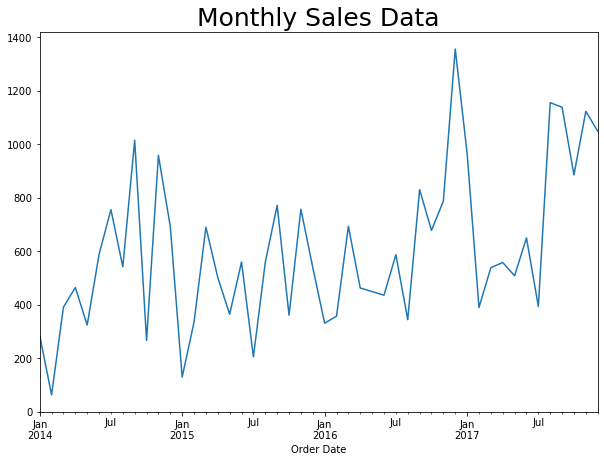

In [16]:
plt.title("Monthly Sales Data", fontsize =25)
monthly.plot(figsize = (10, 7))
plt.show()

In [17]:
# decomposition of Sales data according to Seasonality, trend and residuals 

from statsmodels.tsa.seasonal import seasonal_decompose

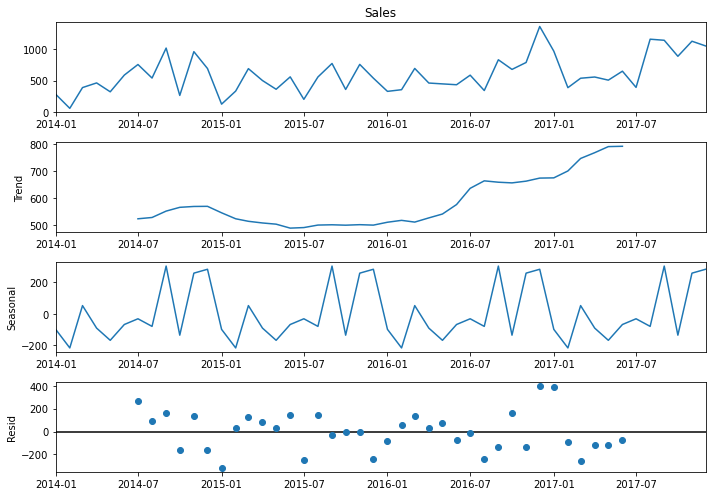

In [18]:
plt.rcParams['figure.figsize'] = 10, 7
decompose=seasonal_decompose(monthly,model='additive')
fig = decompose.plot()

## SARIMAX Model

In [19]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           )
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:762.2281447919565
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:737.0210087396388
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:514.2453781993815
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:513.1741572085307
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:706.439399271889
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:704.9624304731009
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:513.3432763125832
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:515.1590773682121
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:731.7028563417468
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:720.6398783735245
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:515.5016056568015
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:512.763662861698
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:702.5123922552579
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:698.4439644850224
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:512.3946157618741
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:514.3326678668149
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:680.3485938714521
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:681.0774006348681
ARIMA(0, 1, 

C:\Users\12AU\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:661.2230717151792
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:497.5151776610666
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:498.06635920733464
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:695.5204665663382
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:695.0436720369171
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:515.2555265281073
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:511.77898257392746
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:692.488770664891
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:688.7810282317639
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:511.2925670409826
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:513.1764440134364
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:682.8122268070802
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:681.6520747366271
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:516.1144290414086
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:510.32175150412206
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:679.9732891565916
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:679.0293998394957
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:511.78179177074827
ARIMA(1

C:\Users\12AU\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:503.8027975896711
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:666.599168723799
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:665.4860857412534
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:504.1442839352761
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:497.9780406565852
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:663.7162584715248


C:\Users\12AU\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:662.4614063155723
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:498.78806471464327
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:499.64734207029636


### Fitting the ARIMA Model using the Optimal parameters¶


In [37]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12))

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1720      0.229      0.750      0.453      -0.278       0.622
ma.L1         -0.8840      0.190     -4.647      0.000      -1.257      -0.511
ar.S.L12      -0.5448      0.238     -2.291      0.022      -1.011      -0.079
sigma2       6.41e+04   1.41e+04      4.555      0.000    3.65e+04    9.17e+04


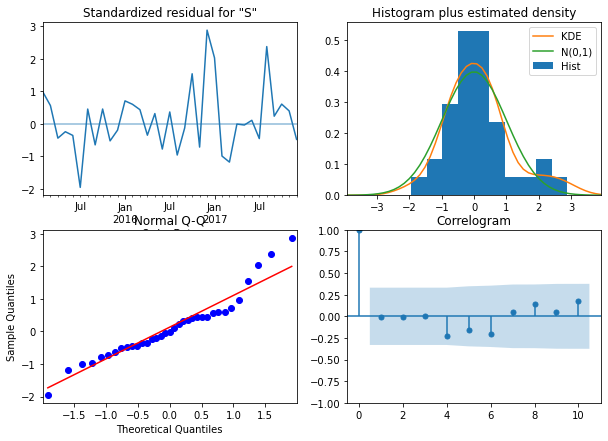

In [38]:
# model diagnostics to investigate any unusual behavior.
results.plot_diagnostics()
plt.show()

## Validating Forecasts

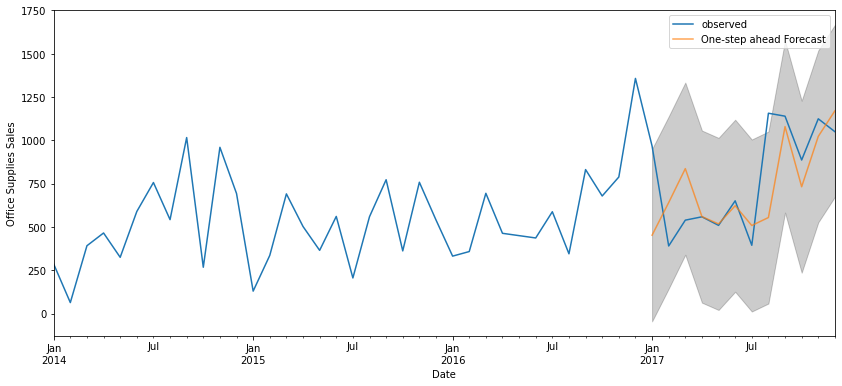

In [39]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

In [40]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70427.2


In [41]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 265.38


### Producting and Visualizing Forecasts

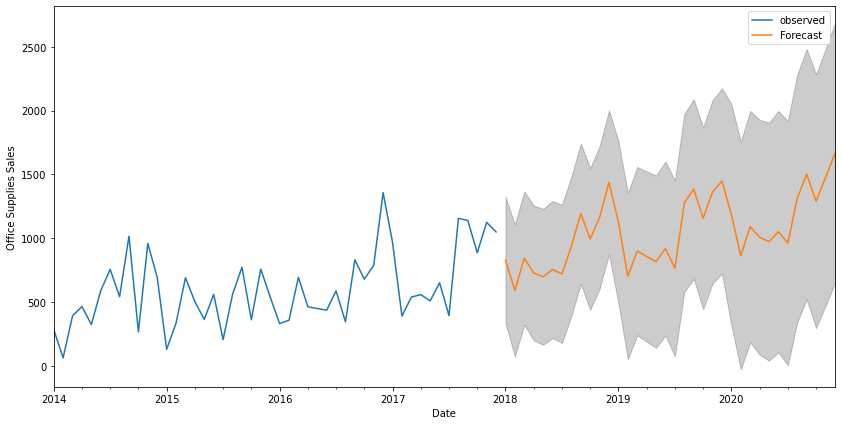

In [42]:
pred_uc = results.get_forecast(steps = 36)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

###   Time Series of Office Supplies vs. Furniture

In [43]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture[['Order Date', 'Sales']]
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [44]:
monthly_office = monthly
monthly_furniture = furniture['Sales'].resample('MS').mean()

In [45]:
furniture = pd.DataFrame({'Order Date':monthly_furniture.index, 'Sales':monthly_furniture.values})
office = pd.DataFrame({'Order Date': monthly_office.index, 'Sales': monthly_office.values})

store = furniture.merge(office, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


## Visualizing the Sales Data

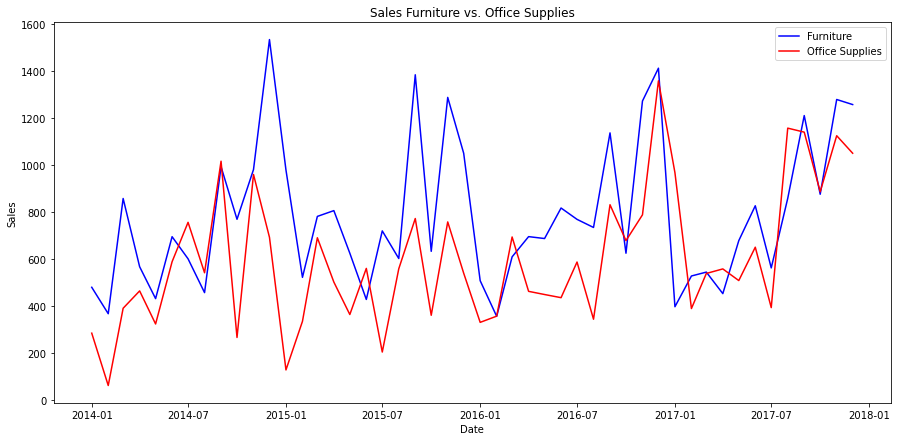

In [46]:
plt.figure(figsize = (15, 7))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'Furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Furniture vs. Office Supplies')
plt.legend()
plt.show()

In [47]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is : {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is : 2014-07-01.
